In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [9]:
file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\13_week\AAME.csv"
df = pd.read_csv(file_path)

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [13]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10093,False,False,False,False,False,False,False
10094,False,False,False,False,False,False,False
10095,False,False,False,False,False,False,False
10096,False,False,False,False,False,False,False


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [17]:
open_prices = df[['Open']].to_numpy()

In [19]:
scaler = MinMaxScaler()
open_scaled = scaler.fit_transform(open_prices)

In [21]:
def make_sequence(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = make_sequence(open_scaled, window_size)

In [23]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [25]:
model = Sequential([
    Input(shape=(window_size, 1)),
    LSTM(32, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

Epoch 1/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0087 - val_loss: 1.4992e-04
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0032 - val_loss: 5.1564e-05
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0039 - val_loss: 4.3098e-05
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - val_loss: 5.9986e-05
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0043 - val_loss: 4.3530e-05
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0036 - val_loss: 5.2081e-05
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0026 - val_loss: 4.3909e-05
Epoch 8/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0031 - val_loss: 3.7215e-05
Epoch 9/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0025 - val_loss: 1.4821e-04
Epoch 10/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0028 - val_loss: 6.8425e-05
Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0034 - val_loss: 8.1299e-05
Epoch 12

In [26]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [27]:
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"\n✅ Test MSE: {mse:.4f}")


✅ Test MSE: 0.0126


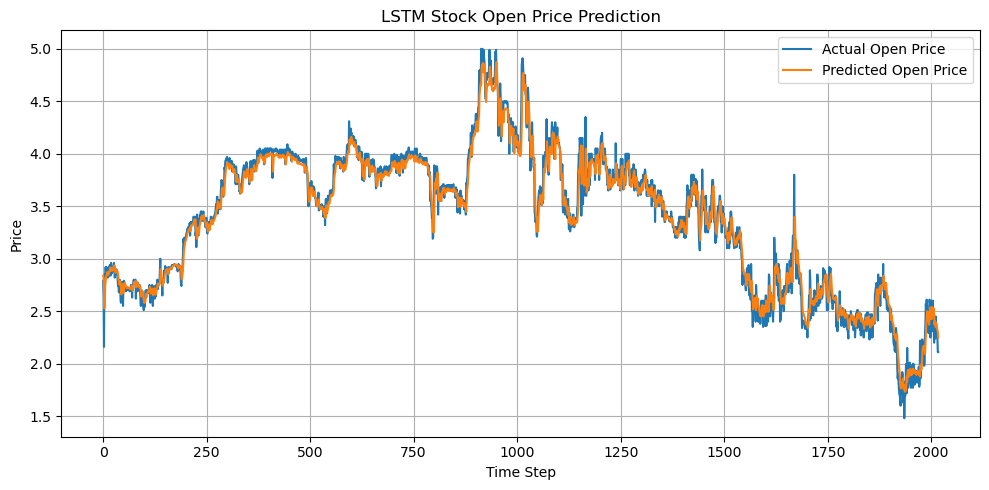

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, label='Actual Open Price')
plt.plot(y_pred_inverse, label='Predicted Open Price')
plt.title('LSTM Stock Open Price Prediction')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()